Grupo 1:
- Guido
- Neyra
- Julio
- Teresin
- Mayco 

In [ ]:
! pip install scikit-dsp-comm
! pip install scikit-commpy

     |████████████████████████████████| 51kB 2.7MB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sk_dsp_comm import digitalcom as dc
from scipy.fftpack import fft, fftfreq

In [ ]:
fs = 1000   # [Hz] Frecuencia de muestreo
duracion = 1 # [s] Duración de la señal
N_bits = np.int(fs*duracion) # Número total de bits
print(N_bits)
sps = 8 # Samples per symbol

1000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


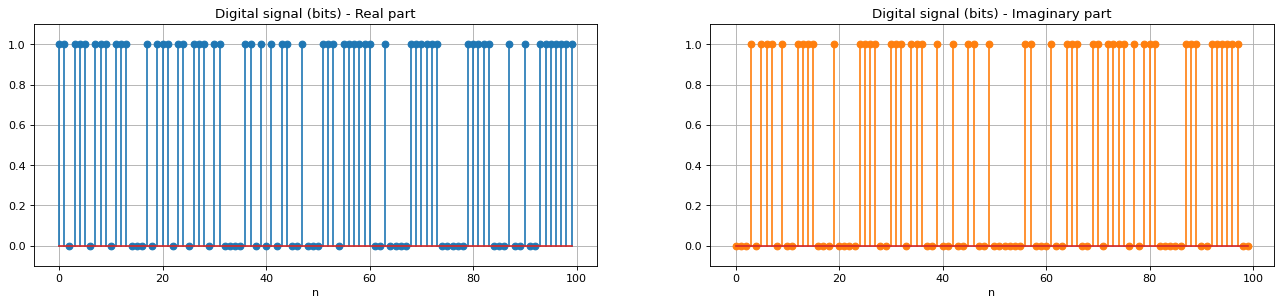

In [ ]:
i_bits = np.random.randint(2, size=N_bits) # Our data to be transmitted, 1s and 0s

plt.figure(figsize=(20,4), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.stem(i_bits[0:100])
plt.title('Digital signal (bits) - Real part')
plt.ylim([-0.1, 1.1])
plt.xlabel('n')
plt.grid()

q_bits = np.random.randint(2, size=N_bits) # Our data to be transmitted, 1s and 0s

plt.subplot(1,2,2)
plt.stem(q_bits[0:100],linefmt='C1-',markerfmt='C1o')
plt.title('Digital signal (bits) - Imaginary part')
plt.ylim([-0.1, 1.1])
plt.xlabel('n')
plt.grid()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


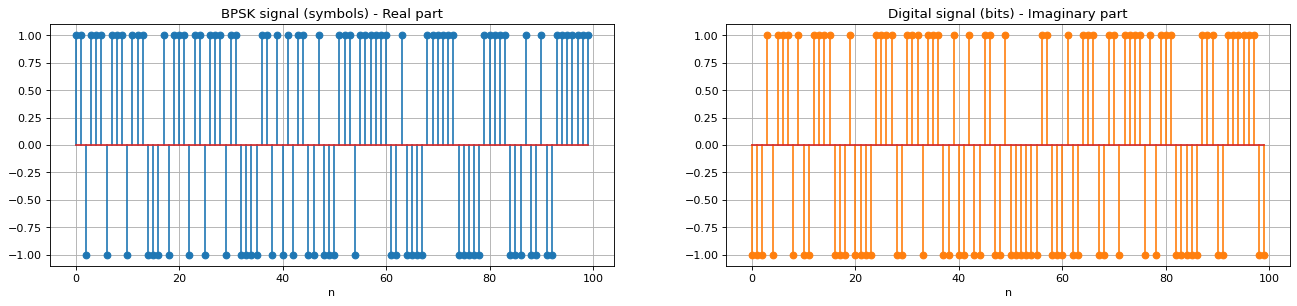

In [ ]:
i_symbols = 2*i_bits-1 #para convertir 0 y 1 en -1 y +1

plt.figure(figsize=(20,4), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.stem(i_symbols[0:100])
plt.title('BPSK signal (symbols) - Real part')
plt.ylim([-1.1, 1.1])
plt.xlabel('n')
plt.grid()

q_symbols = 2*q_bits-1 #para convertir 0 y 1 en -1 y +1

plt.subplot(1,2,2)
plt.stem(q_symbols[0:100],linefmt='C1-',markerfmt='C1o')
plt.title('Digital signal (bits) - Imaginary part')
plt.ylim([-1.1, 1.1])
plt.xlabel('n')
plt.grid()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


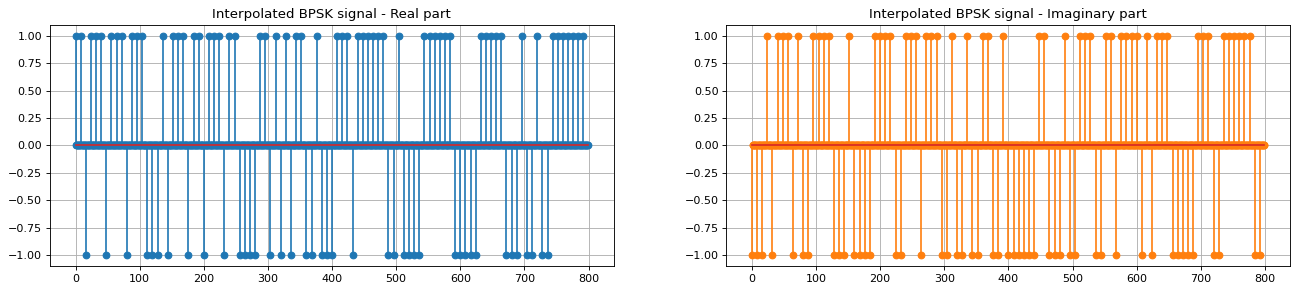

In [ ]:
i_interp = np.array([])
for symbol in i_symbols:
    pulse = np.zeros(sps)
    pulse[0] = symbol 
    i_interp = np.concatenate((i_interp, pulse)) # add the 8 samples to the signal
    
plt.figure(figsize=(20,4), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.stem(i_interp[0:800])
plt.title('Interpolated BPSK signal - Real part')
plt.grid()

q_interp = np.array([])
for symbol in q_symbols:
    pulse = np.zeros(sps)
    pulse[0] = symbol 
    q_interp = np.concatenate((q_interp, pulse)) # add the 8 samples to the signal
    
plt.subplot(1,2,2)
plt.stem(q_interp[0:800],linefmt='C1-',markerfmt='C1o')
plt.title('Interpolated BPSK signal - Imaginary part')
plt.grid()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


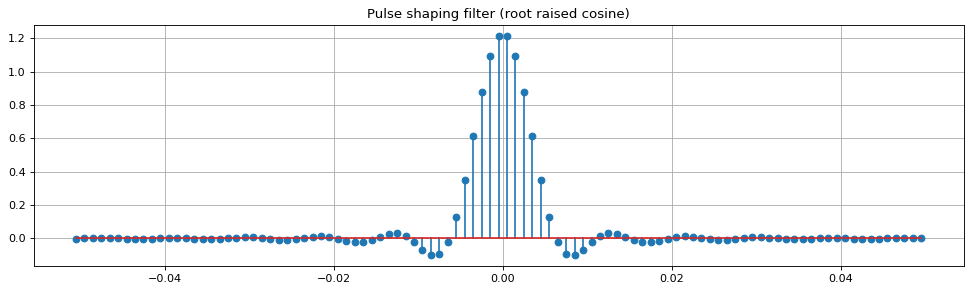

In [ ]:
# Filtro raíz de coseno realzado
import commpy

num_taps = 101
beta = 0.85
Ts = sps/fs # Assume sample rate is 1 Hz, so sample period is 1, so *symbol* period is 8

t_rrc,h_rrc = commpy.filters.rrcosfilter(num_taps,beta,Ts,fs)

plt.figure(figsize=(15,4), dpi= 80, facecolor='w', edgecolor='k')
plt.stem(t_rrc,h_rrc)
plt.title('Pulse shaping filter (root raised cosine)')
plt.grid(True)
plt.show()

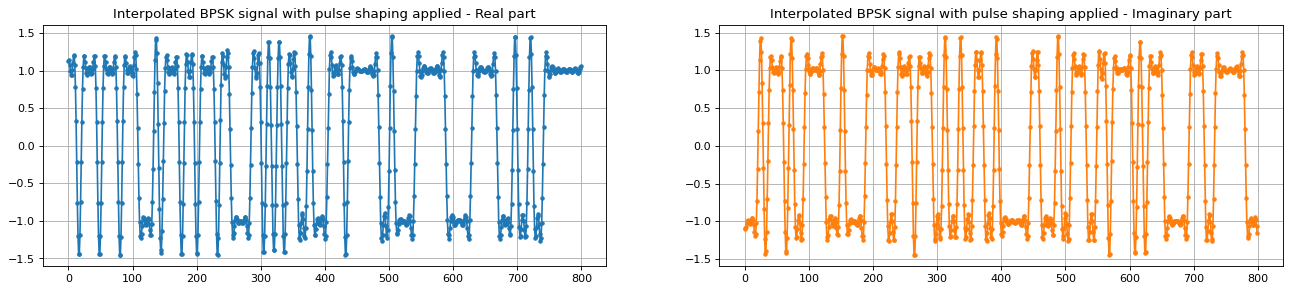

In [ ]:
# Filter our signal, in order to apply the pulse shaping
i_shaped = np.convolve(i_interp, h_rrc)
tau_g = int(num_taps/2)
i_shaped = i_shaped[tau_g:] # Retardo de grupo

plt.figure(figsize=(20,4), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.plot(i_shaped[0:800], '.-')
#for i in range(num_symbols):
#    plt.plot([i*sps+num_taps//2+1,i*sps+num_taps//2+1], [min(x_shaped), max(x_shaped)])
plt.title('Interpolated BPSK signal with pulse shaping applied - Real part')
plt.grid()

# Filter our signal, in order to apply the pulse shaping
q_shaped = np.convolve(q_interp, h_rrc)
q_shaped = q_shaped[tau_g:] # Retardo de grupo

plt.subplot(1,2,2)
plt.plot(q_shaped[0:800], 'C1.-')
#for i in range(num_symbols):
#    plt.plot([i*sps+num_taps//2+1,i*sps+num_taps//2+1], [min(x_shaped), max(x_shaped)])
plt.title('Interpolated BPSK signal with pulse shaping applied - Imaginary part')
plt.grid()
plt.show()

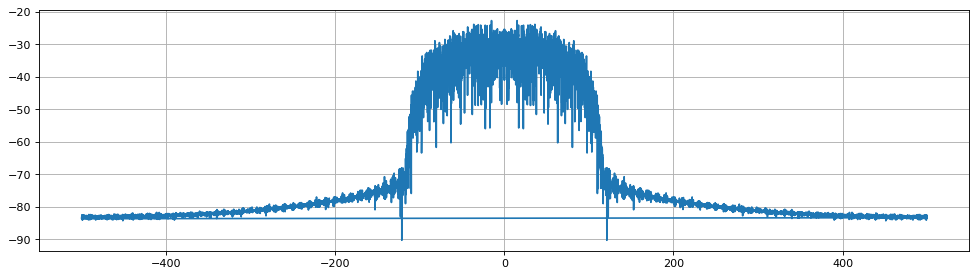

In [ ]:
N_is = i_shaped.shape[0]
I_shaped = fft(i_shaped)/N_is
frq = fftfreq(N_is, 1/fs)
plt.figure(figsize=(15, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(frq, 20*np.log10(abs(I_shaped)))
plt.grid()
plt.show()

<Figure size 1600x320 with 0 Axes>

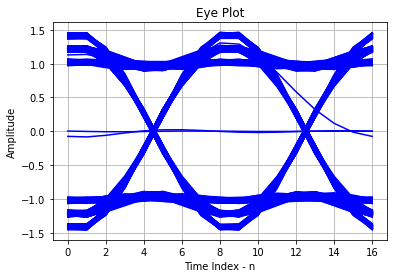

In [ ]:
data_i = i_shaped # ndarray of the real input data vector/array
L = sps*2       # display length in samples (usually two symbols)
S = 0           # start index
plt.figure(figsize=(20,4), dpi= 80, facecolor='w', edgecolor='k')
dc.eye_plot(data_i,L,S)
plt.show()

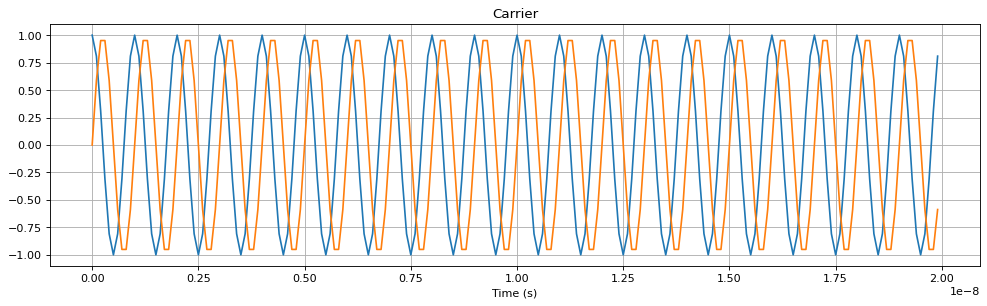

In [ ]:
# carrier 
f_c = 1e9  # [Hz] frecuencia del oscilador local (carrier)

# para simular el oscilador local (analógico) uso como "frecuencia de muestreo" 10 FC
fsc = 10*f_c
tsc = 1/fsc 

# cuando usemos el Pluto el OL se configura en el AD9361
n_c = np.arange(len(i_shaped))
OL_i = np.cos(2*np.pi*f_c*n_c*tsc)
OL_q = np.sin(2*np.pi*f_c*n_c*tsc)

plt.figure(figsize=(15, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(n_c[:200]*tsc, OL_i[:200],n_c[:200]*tsc, OL_q[:200])
plt.title('Carrier')
plt.ylim([-1.1, 1.1])
plt.xlabel('Time (s)')
plt.grid()
plt.show()

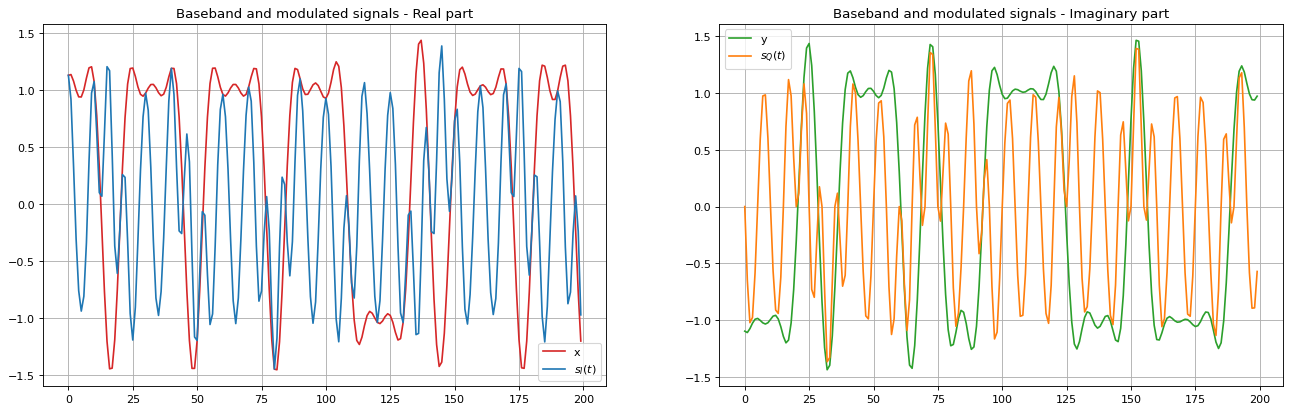

In [ ]:
# señal modulada
st_i = i_shaped*OL_i

plt.figure(figsize=(20, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.plot(i_shaped[0:200],'C3-',label='x')
plt.plot(st_i[0:200],'C0-',label='$s_{I}(t)$')
plt.title('Baseband and modulated signals - Real part')
plt.legend()
plt.grid()


st_q = q_shaped*OL_q  

plt.subplot(1,2,2)
plt.plot(q_shaped[0:200],'C2-',label='y')
plt.plot(st_q[0:200],'C1-',label='$s_{Q}(t)$')
plt.title('Baseband and modulated signals - Imaginary part')
plt.legend()
plt.grid()

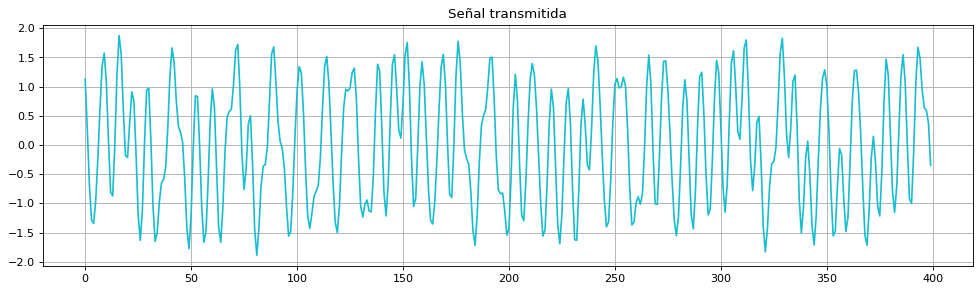

In [ ]:
st = st_i + st_q

plt.figure(figsize=(15, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(st[0:400],'C9')
plt.title('Señal transmitida')
plt.grid()

8050


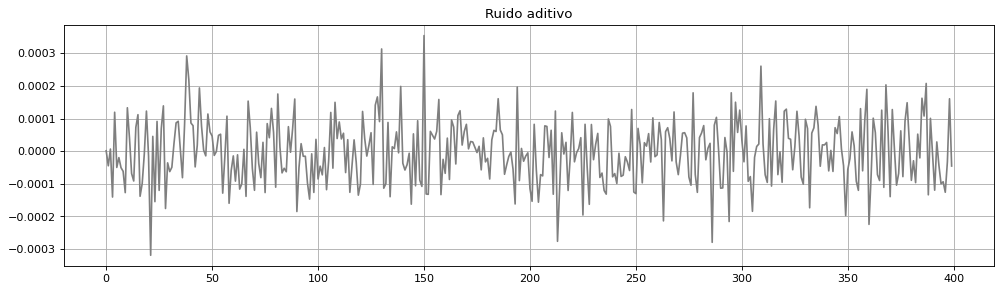

In [ ]:
 noise = np.random.normal(0,0.0001,len(st))

plt.figure(figsize=(15, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(noise[0:400],'C7')
plt.title('Ruido aditivo')
plt.grid()
print(len(st))

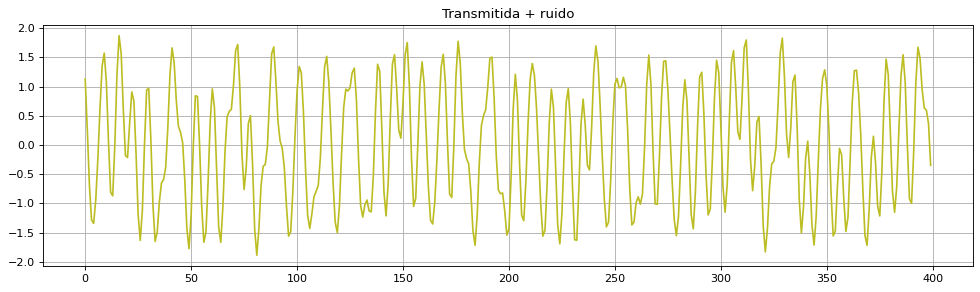

In [ ]:
st_noise = st + noise

plt.figure(figsize=(15, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(st_noise[0:400],'C8')
plt.title('Transmitida + ruido')
plt.grid()

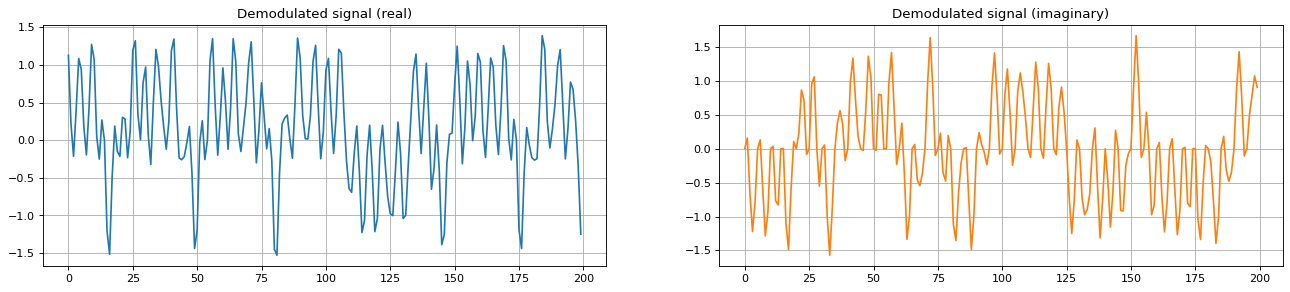

In [ ]:
rt_i = st_noise * OL_i
rt_q = st_noise * OL_q

plt.figure(figsize=(20,4), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.plot(rt_i[0:200])
plt.title('Demodulated signal (real)')
plt.grid()

plt.subplot(1,2,2)
plt.plot(rt_q[0:200],'C1')
plt.title('Demodulated signal (imaginary)')
plt.grid()

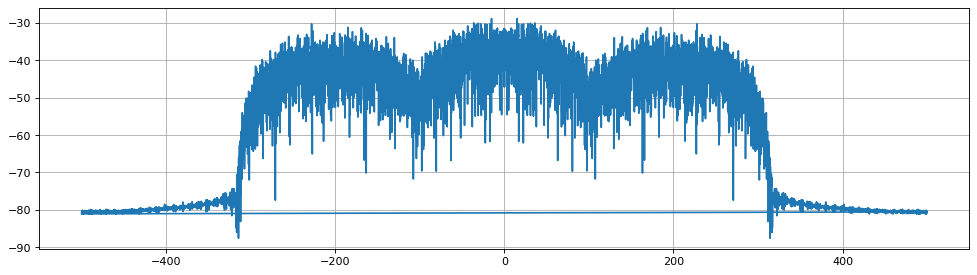

In [ ]:
N_rt_i = rt_i.shape[0]
Rf = fft(rt_i)/N_rt_i
frq = fftfreq(N_rt_i, 1/fs)
plt.figure(figsize=(15, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(frq, 20*np.log10(abs(Rf)))
plt.grid()
plt.show()

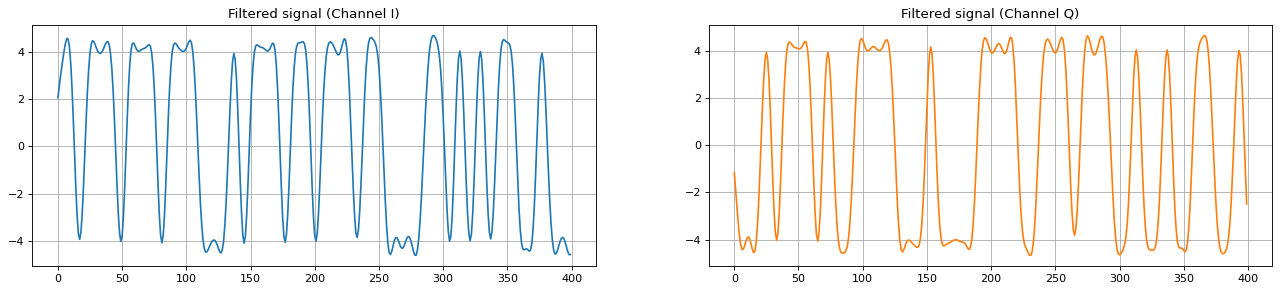

In [ ]:
filtered_i = np.convolve(rt_i,h_rrc)
filtered_i = filtered_i[50:] # Retardo de grupo
plt.figure(figsize=(20, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.plot(filtered_i[0:400])
plt.title('Filtered signal (Channel I)')
plt.grid()

filtered_q = np.convolve(rt_q,h_rrc)
filtered_q = filtered_q[50:] # Retardo de grupo
plt.subplot(1,2,2)
plt.plot(filtered_q[0:400],'C1')
plt.title('Filtered signal (Channel Q)')
plt.grid()

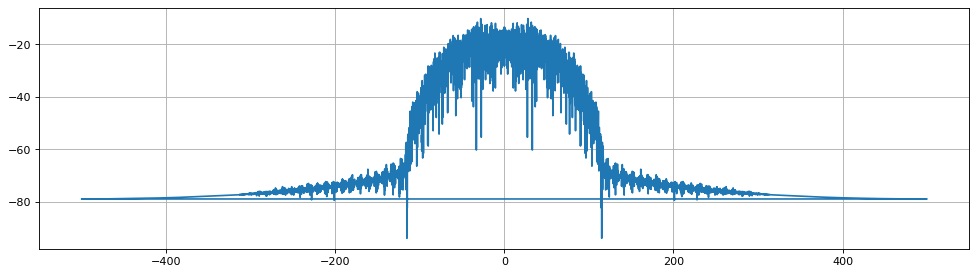

In [ ]:
N_fil_i = filtered_i.shape[0]
FIL_i = fft(filtered_i)/N_fil_i
frq = fftfreq(N_fil_i, 1/fs)
plt.figure(figsize=(15, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(frq, 20*np.log10(abs(FIL_i)))
plt.grid()
plt.show()

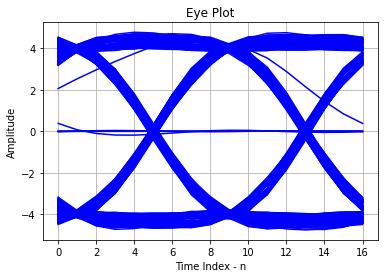

In [ ]:
data = filtered_i # ndarray of the real input data vector/array
L = sps*2         # display length in samples (usually two symbols)
S = 0             # start index

dc.eye_plot(data,L,S)
plt.show()

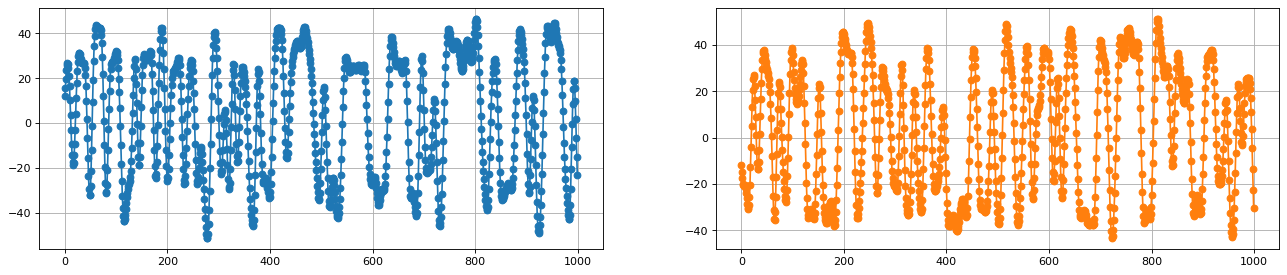

In [ ]:
y_i = np.convolve(filtered_i,np.ones(sps)) # integra en una ventana igual al tiempo de símbolo 
y_i = y_i[int(sps/2):] # Retardo de grupo
plt.figure(figsize=(20, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.plot (y_i[0:1000],'-o')
plt.grid()

y_q = np.convolve(filtered_q,np.ones(sps)) # integra en una ventana igual al tiempo de símbolo 
y_q = y_q[int(sps/2):] # Retardo de grupo
plt.subplot(1,2,2)
plt.plot (y_q[0:1000],'C1-o')
plt.grid()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


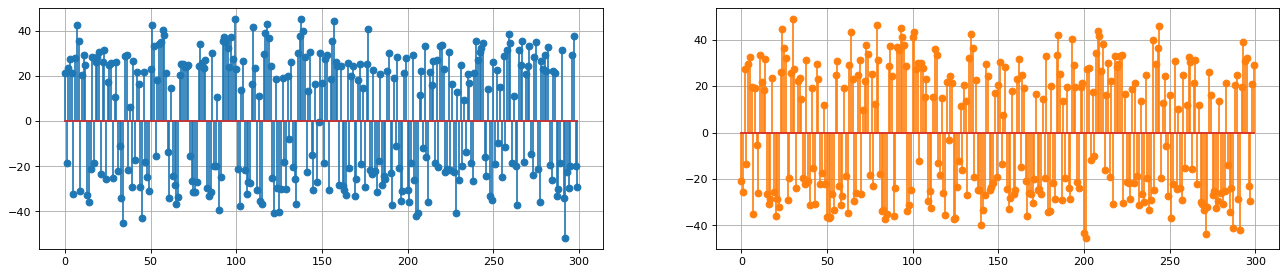

In [ ]:
# sampling
ys_i=y_i[sps::sps]
plt.figure(figsize=(20, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.stem(ys_i[:300])
plt.grid()

ys_q=y_q[sps::sps]
plt.subplot(1,2,2)
plt.stem(ys_q[:300],linefmt='C1-',markerfmt='C1o')
plt.grid()

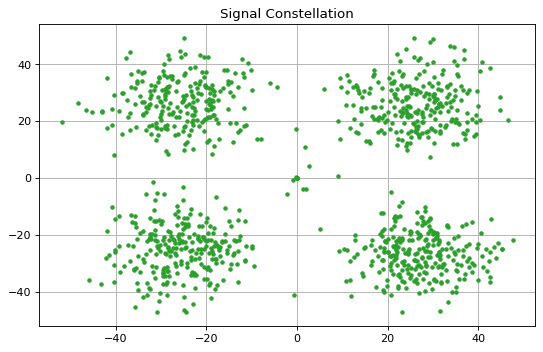

In [ ]:
plt.figure(figsize=(8,5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(ys_i,ys_q, 'C2.')
plt.title('Signal Constellation')
plt.grid()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly i

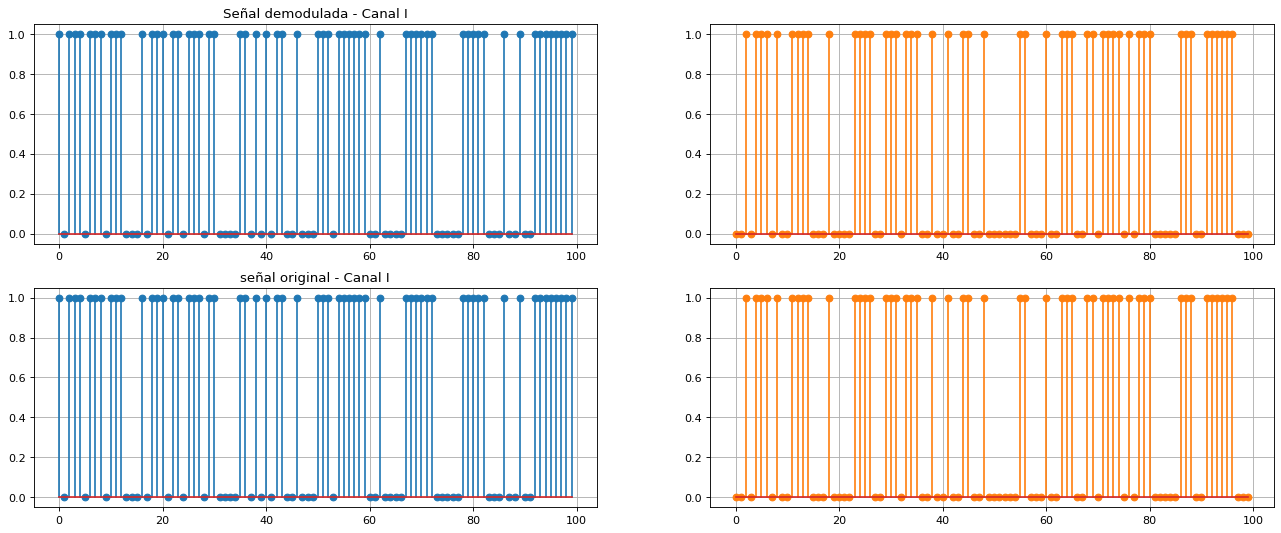

In [ ]:
ak_i=1*(ys_i>0) # detector de umbral
#data_x==ak_x # compara bits transmitidos con bits recibidos
plt.figure(figsize=(20, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(2,2,1)
plt.stem(ak_i[:100])
plt.title('Señal demodulada - Canal I')
plt.grid()

ak_q=1*(ys_q>0) # detector de umbral
plt.subplot(2,2,2)
plt.stem(ak_q[:100],linefmt='C1-',markerfmt='C1o')
plt.grid()

plt.subplot(2,2,3)
plt.stem(i_bits[1:101])
plt.title('señal original - Canal I')
plt.grid()

plt.subplot(2,2,4)
plt.stem(q_bits[1:101],linefmt='C1-',markerfmt='C1o')
plt.grid()

# Bit Error Rate

In [ ]:
ber_data = np.sum(np.abs(ak_i[0:len(i_bits)] - i_bits))/len(i_bits)

print('BER',ber_data)

BER 0.515
